In [31]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline

from library.sb_utils import save_file

In [2]:
#Import traning and test sets from preprocessing

datapath = "../data/"
X_train = pd.read_csv(datapath+"X_train.csv", index_col=0)
X_test = pd.read_csv(datapath+"X_test.csv", index_col=0)
y_train = pd.read_csv(datapath+"y_train.csv", index_col=0)
y_test = pd.read_csv(datapath+"y_test.csv", index_col=0)
#X_train = np.genfromtxt(datapath+"X_train.csv", delimiter=',')
#X_test = np.genfromtxt(datapath+"X_test.csv", delimiter=',')
#y_train = np.genfromtxt(datapath+"y_train.csv", delimiter=',')
#y_test = np.genfromtxt(datapath+"y_test.csv", delimiter=',')
#columns = np.genfromtxt(datapath+"columns.csv", delimiter=',', dtype=None, encoding='utf-8')

In [3]:
#Scale using robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [4]:
#Model 0: Assess performance when all tests come back positive (M=1)
from sklearn.dummy import DummyClassifier

dum_class = DummyClassifier(strategy='constant', constant=1)
dum_class.fit(X_train_scaled, y_train)
y_pred_0 = dum_class.predict(X_test_scaled)

Precision score 0.3742690058479532
Recall score  1.0


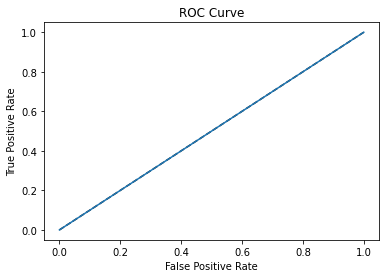

ROC-AUC score : 0.5


In [5]:
#Scoring the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

print('Precision score', metrics.precision_score(y_test,y_pred_0))
print('Recall score ', metrics.recall_score(y_test,y_pred_0))
y_pred_prob = dum_class.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC score :", roc_auc_score(y_test, y_pred_0))

The purpose of this model is to establish a baseline of randomly guessing that all tests are positive for cancer. The precision score - the proportion of true malignant predictions over all malignant predictions - is about 0.37, which corresponds to the proportion of the tests in the dataset that were classified as malignant. This obviously means that this "model" would over-diagnose over 60% of all tests, which would mean unnecessary intervention, expense, and worry. 


The recall score - the proportion of true malignant predictions over all malignant malignant diagnoses - is 1.0, which makes sense given that all tests were predicted as true. In other words, this model would not miss any tests where malignant cells were present, as it assumes they are all malignant. 

Finally, the ROC-AUC is 0.5, which is associated with randomly guessing. 

This serves as a benchmark through which I will evaluate my modeling efforts. A model that doesn't over diagnose cancer but still doesn't miss cancer is the goal.

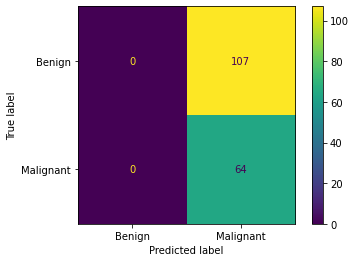

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_0))

In [7]:
#Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.1)
clf.fit(X_train_scaled, y_train)
y_pred_1 = clf.predict(X_test_scaled)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision score 1.0
Recall score  0.953125


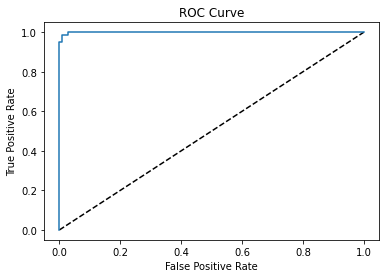

ROC-AUC score : 0.9765625


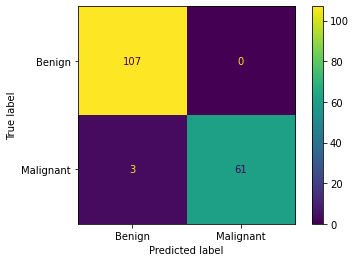

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
print('Precision score', metrics.precision_score(y_test,y_pred_1))
print('Recall score ', metrics.recall_score(y_test,y_pred_1))
y_pred_prob = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC score :", roc_auc_score(y_test, y_pred_1))

cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_0))

That looks wonderful, doesn't it? It's also clearly wrong. I have not done any feature selection, so some features are arbitrarily weighted. We need to do more judicial feature selection, as I believe this is overfit.

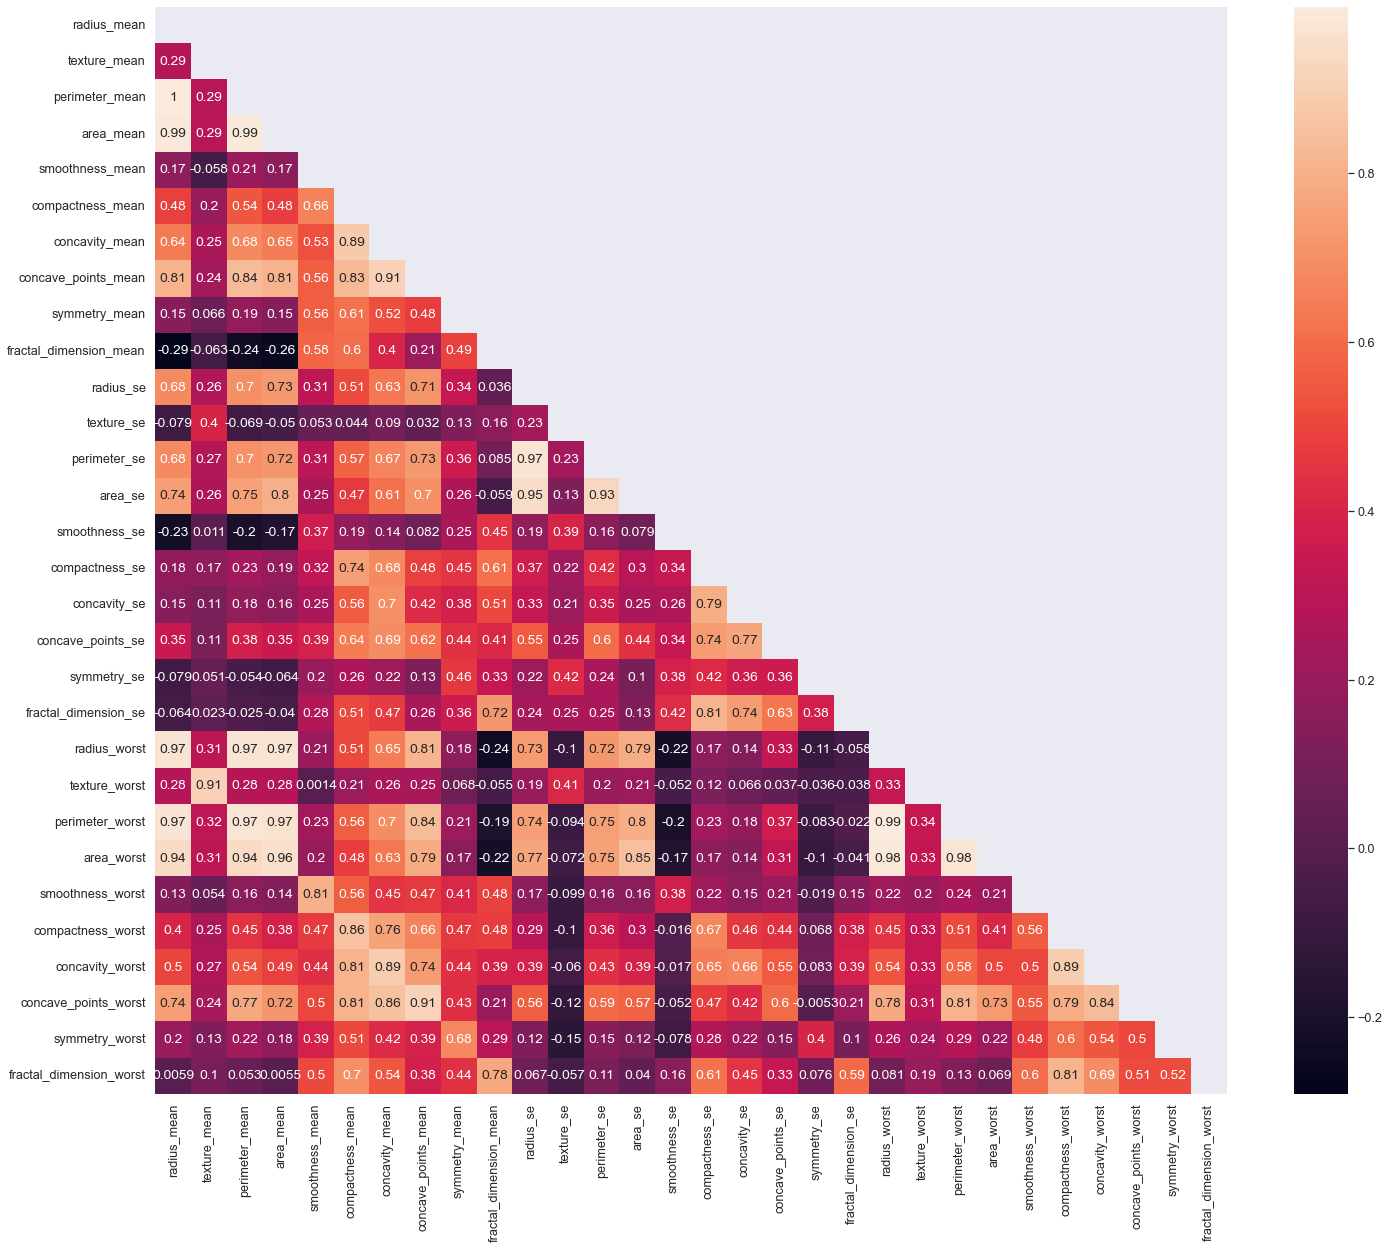

In [9]:
#Generate Heatmap of features

sns.set(font_scale=1.15)
plt.subplots(figsize=(24,20))
# Compute the correlation matrix
corr = X_train_scaled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

_ = sns.heatmap(corr, annot=True, mask=mask)
plt.show()

First, we need to identify the highly correlated features (>0.95), and drop all but 1.
These features are:

-radius_mean
-perimeter_mean
-area_mean
-radius_se
-radius_worst
-perimeter_worst

In [10]:
#Manual Feature selection
#note that there are still some very highly correlated features, but these are the worst

dropfeatures = ['radius_mean', 'area_mean', 'radius_se', 'radius_worst','perimeter_worst']

X_train_1 = X_train_scaled.drop(columns=dropfeatures)
X_test_1 = X_test_scaled.drop(columns=dropfeatures)



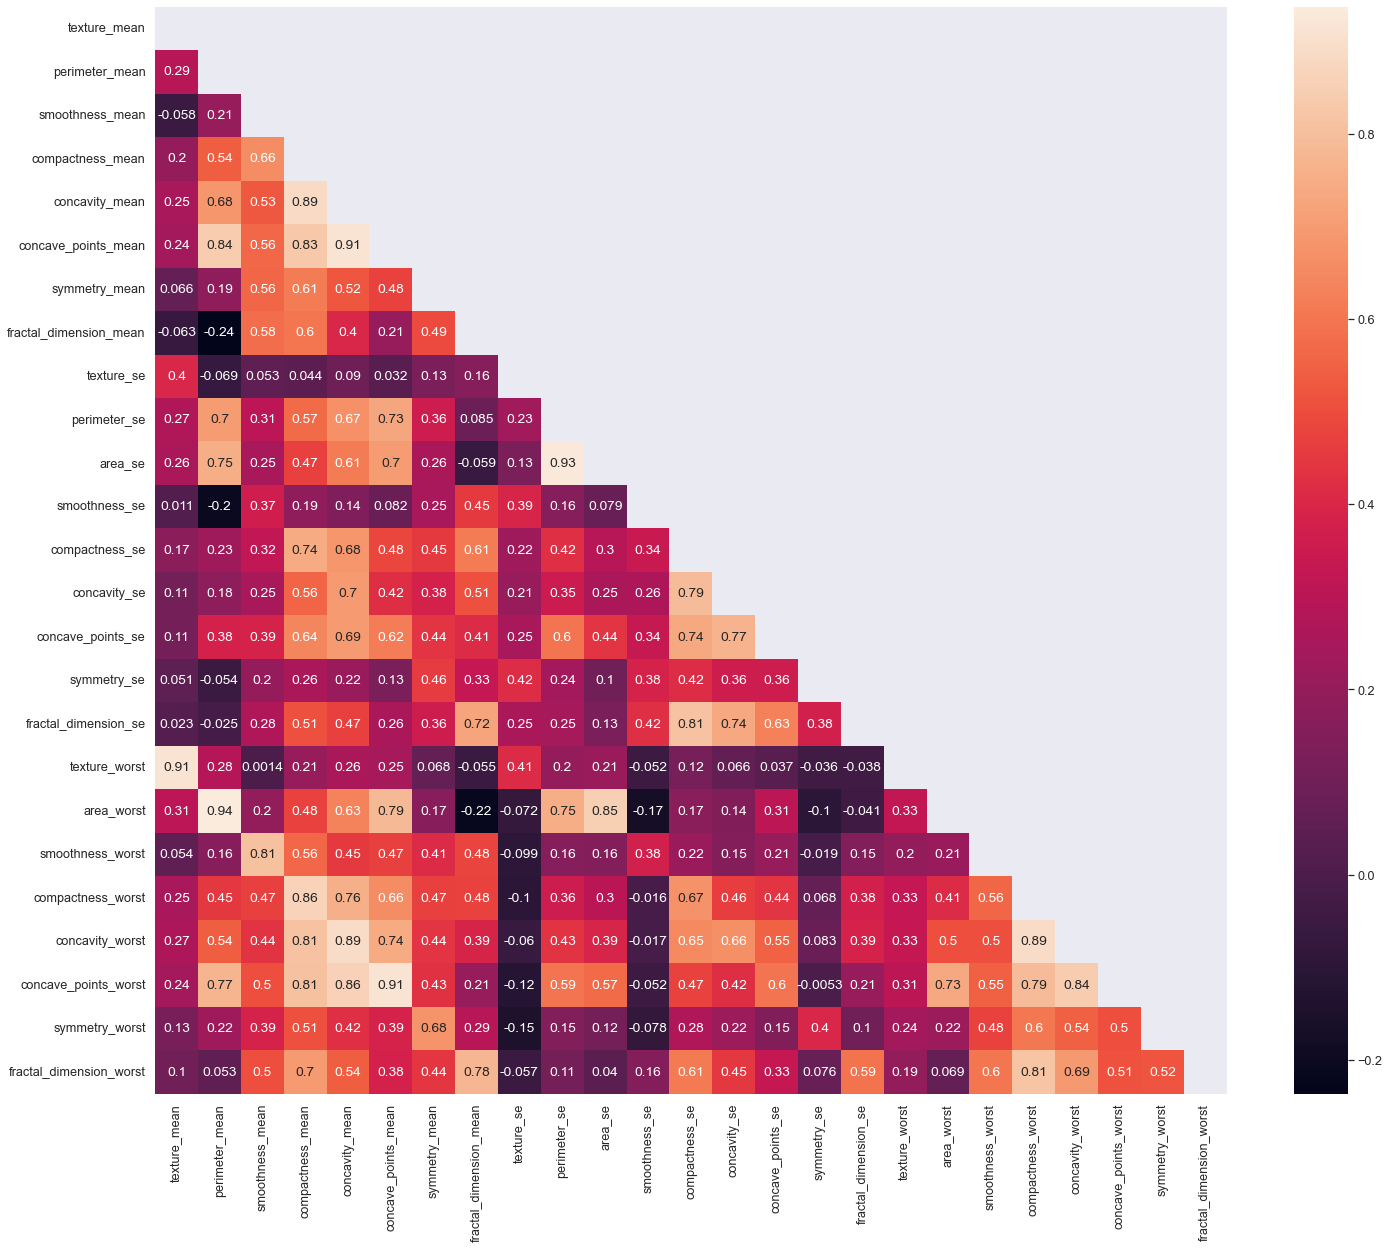

In [11]:
#Check a new heatmap to confirm 
plt.subplots(figsize=(24,20))
# Compute the correlation matrix
corr = X_train_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

_ = sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [12]:
#VIF scores
#from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#add a constant to the training set
X_train_1 = sm.add_constant(X_train_1)



#features = "+".join(X_train_1.columns)
#training_set = pd.concat([X_train, y_train], axis=1)

# get y and X dataframes based on this regression:
#y, X = dmatrices('diagnosis ~' + features, training_set, return_type='dataframe')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,2.3,const
1,10.5,texture_mean
2,25.3,perimeter_mean
3,8.5,smoothness_mean
4,33.2,compactness_mean
5,74.1,concavity_mean
6,60.5,concave_points_mean
7,4.2,symmetry_mean
8,14.8,fractal_dimension_mean
9,4.0,texture_se


Features with high (>10) VIFs:
perimeter_mean, texture_mean, compactness_mean, concavity_mean, concave_points_mean, fractal_dimension_mean, perimeter_se, area_se, compac

In [14]:
#Drop concavity mean, recalculate
X_train_1.drop(columns='concavity_mean', inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,2.2,const
1,10.5,texture_mean
2,25.2,perimeter_mean
3,8.1,smoothness_mean
4,29.1,compactness_mean
5,28.3,concave_points_mean
6,4.2,symmetry_mean
7,14.8,fractal_dimension_mean
8,4.0,texture_se
9,14.9,perimeter_se


In [15]:
#Drop concave points mean, recalculate
X_train_1.drop(columns='concave_points_mean', inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.7,const
1,10.5,texture_mean
2,22.9,perimeter_mean
3,7.4,smoothness_mean
4,25.3,compactness_mean
5,4.2,symmetry_mean
6,14.8,fractal_dimension_mean
7,4.0,texture_se
8,14.9,perimeter_se
9,17.3,area_se


In [16]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['compactness_worst', 'perimeter_mean'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.6,const
1,10.3,texture_mean
2,7.1,smoothness_mean
3,16.2,compactness_mean
4,4.1,symmetry_mean
5,10.2,fractal_dimension_mean
6,3.9,texture_se
7,14.9,perimeter_se
8,16.4,area_se
9,4.0,smoothness_se


In [17]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['concave_points_worst'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.6,const
1,10.2,texture_mean
2,7.0,smoothness_mean
3,14.2,compactness_mean
4,4.1,symmetry_mean
5,10.1,fractal_dimension_mean
6,3.9,texture_se
7,14.7,perimeter_se
8,16.4,area_se
9,3.9,smoothness_se


In [18]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['texture_worst','area_se'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.5,const
1,1.7,texture_mean
2,6.5,smoothness_mean
3,13.5,compactness_mean
4,4.0,symmetry_mean
5,10.1,fractal_dimension_mean
6,2.2,texture_se
7,5.2,perimeter_se
8,3.6,smoothness_se
9,9.1,compactness_se


In [19]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['compactness_mean'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.5,const
1,1.7,texture_mean
2,6.1,smoothness_mean
3,3.8,symmetry_mean
4,7.9,fractal_dimension_mean
5,2.1,texture_se
6,5.2,perimeter_se
7,3.6,smoothness_se
8,6.6,compactness_se
9,7.8,concavity_se


In [20]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['fractal_dimension_worst'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.4,const
1,1.7,texture_mean
2,5.9,smoothness_mean
3,3.8,symmetry_mean
4,5.1,fractal_dimension_mean
5,2.1,texture_se
6,5.2,perimeter_se
7,3.5,smoothness_se
8,6.6,compactness_se
9,6.0,concavity_se


In [21]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['smoothness_worst'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.4,const
1,1.7,texture_mean
2,2.9,smoothness_mean
3,3.3,symmetry_mean
4,5.0,fractal_dimension_mean
5,2.1,texture_se
6,5.1,perimeter_se
7,1.9,smoothness_se
8,6.4,compactness_se
9,5.9,concavity_se


In [22]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['compactness_se'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.4,const
1,1.7,texture_mean
2,2.7,smoothness_mean
3,3.3,symmetry_mean
4,5.0,fractal_dimension_mean
5,2.1,texture_se
6,5.1,perimeter_se
7,1.9,smoothness_se
8,5.9,concavity_se
9,4.1,concave_points_se


In [23]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['concavity_se'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.4,const
1,1.7,texture_mean
2,2.6,smoothness_mean
3,3.3,symmetry_mean
4,5.0,fractal_dimension_mean
5,2.1,texture_se
6,5.1,perimeter_se
7,1.9,smoothness_se
8,3.4,concave_points_se
9,2.7,symmetry_se


In [24]:
#Drop concave points mean, recalculate
X_train_1.drop(columns=['perimeter_se'], inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = X_train_1.columns
vif.round(1)

,VIF Factor,features
0,1.4,const
1,1.7,texture_mean
2,2.6,smoothness_mean
3,3.1,symmetry_mean
4,4.7,fractal_dimension_mean
5,2.1,texture_se
6,1.9,smoothness_se
7,3.1,concave_points_se
8,2.5,symmetry_se
9,3.7,fractal_dimension_se


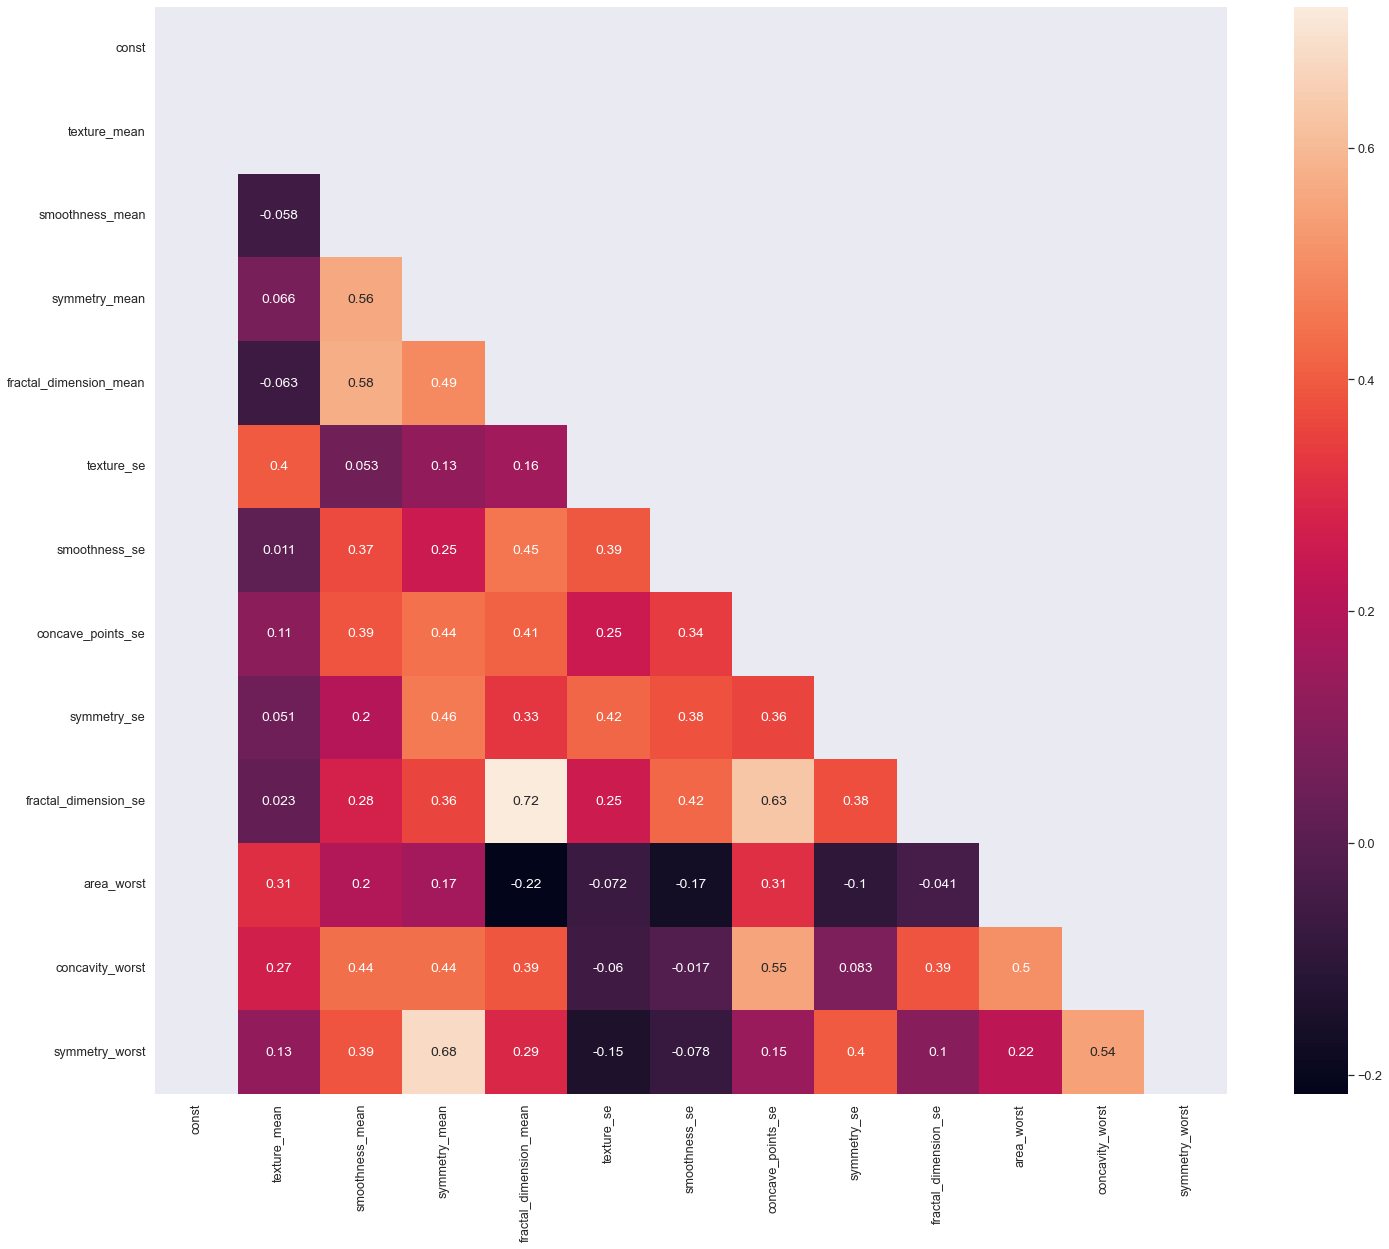

In [25]:
#Check a new heatmap to confirm 
plt.subplots(figsize=(24,20))
# Compute the correlation matrix
corr = X_train_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

_ = sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [26]:
#Perform logistic regression (using sm)
log_reg = sm.Logit(y_train, X_train_1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.071398
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.8918
Time:                        11:54:39   Log-Likelihood:                -28.416
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 1.121e-92
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.0650      0.748     -5.435      0.000      -5.531     

Far and away the most important determinant of diagnosing a malignant test is area_worst, the average area of the 3 largest cells in the sample (as measured by pixels, see EDA for specifics). Next is smoothness_mean, followed by texture_mean, concavity_worst, and symmetry_worst.

In [27]:
#perform unscaled regression for interpreting the coefficients
features = X_train_1.columns
X_train_2 = sm.add_constant(X_train)
X_train_2 = X_train_2[features]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
log_reg = sm.Logit(y_train, X_train_2).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.071398
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.8918
Time:                        12:06:31   Log-Likelihood:                -28.416
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 1.121e-92
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -41.9191     10.618     -3.948      0.000     -62.729     

In [36]:
print("All else equal, the baseline probability that a given test will return positive for breast cancer is "
     + str(math.exp(-41.9191)/(math.exp(-41.9191)+1)))
print("All else equal, a 1 pixel increase in area_worst multiplies the odds of breast cancer by " + str(math.exp(0.0183)))
print("All else equal, a 1 pixel increase in smoothness_mean multiplies the odds of breast cancer by " + str(math.exp(165.6266)))
print("All else equal, a unit grayscale variance increase in texture_mean multiplies the odds of breast cancer by " + str(math.exp(0.4185)))
print("All else equal, a 1 pixel increase in concavity_worst multiplies the odds of breast cancer by " + str(math.exp(8.0409)))
print("All else equal, a 1 pixel increase in symmetry_worst multiplies the odds of breast cancer by " + str(math.exp(26.3082)))

All else equal, the baseline probability that a given test will return positive for breast cancer is 6.233991182273333e-19
All else equal, a 1 pixel increase in area_worst multiplies the odds of breast cancer by 1.0184684711046268
All else equal, a 1 pixel increase in smoothness_mean multiplies the odds of breast cancer by 8.525472078578672e+71
All else equal, a unit grayscale variance increase in texture_mean multiplies the odds of breast cancer by 1.5196803246361734
All else equal, a 1 pixel increase in concavity_worst multiplies the odds of breast cancer by 3105.406799134576
All else equal, a 1 pixel increase in symmetry_worst multiplies the odds of breast cancer by 266382744335.6703


In [93]:
#Bar Chart

probs = lambda x: np.exp(x)/(np.exp(x)+1)
coefs = log_reg.params.apply(probs)
lower = log_reg.conf_int()[0].apply(probs)
upper = log_reg.conf_int()[1].apply(probs)
upper["smoothness_se"]=1

const                     6.800036e-10
texture_mean              6.626769e-01
smoothness_mean           1.000000e+00
symmetry_mean             1.000000e+00
fractal_dimension_mean    1.000000e+00
texture_se                9.416648e-01
smoothness_se             1.000000e+00
concave_points_se         1.000000e+00
symmetry_se               8.969818e-06
fractal_dimension_se      1.000000e+00
area_worst                5.064687e-01
concavity_worst           9.999998e-01
symmetry_worst            1.000000e+00
Name: 1, dtype: float64

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from collections import OrderedDict

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


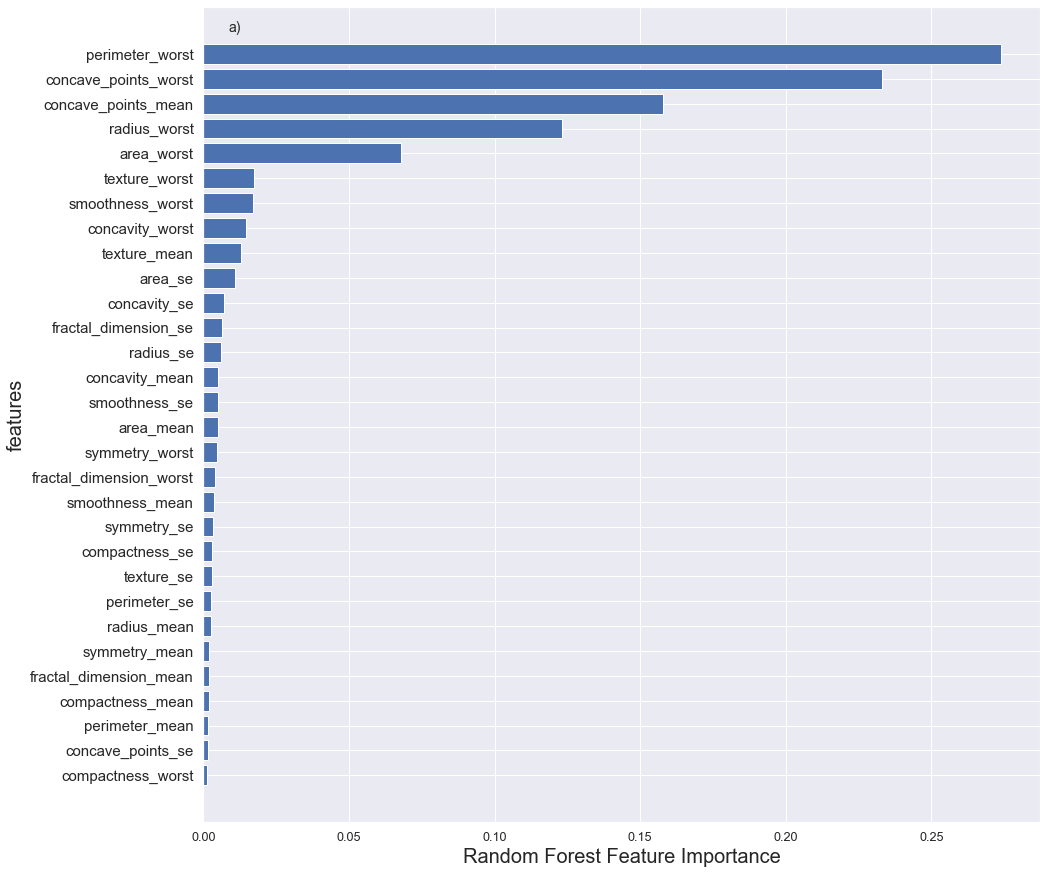

In [46]:
#1 Feature importances: all columns, scaled, random forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(X_train_scaled.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance", fontsize=20);
plt.ylabel("features", fontsize=20);
plt.yticks(fontsize=15);
plt.annotate("a)", xy=(0.03, 0.97), xycoords='axes fraction', fontsize=14)
plt.show()

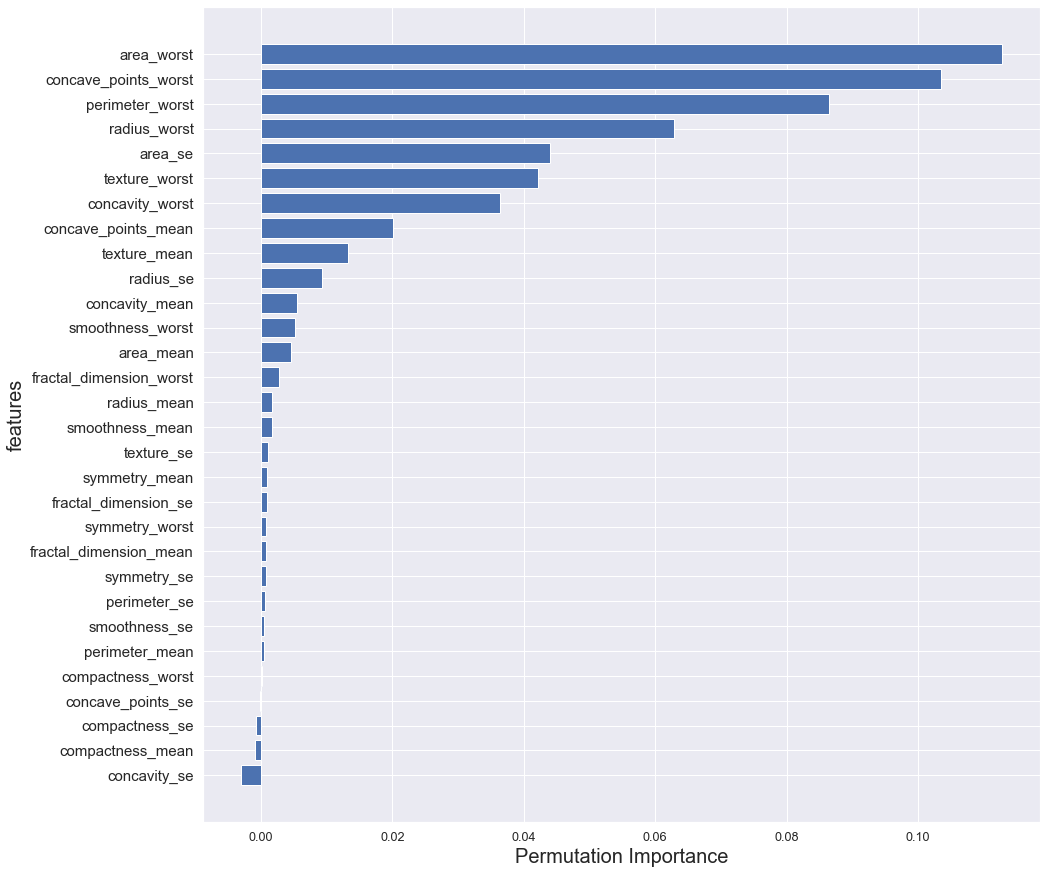

In [47]:
#2 Feature importances: all columns, scaled, permutation-based
perm_importance = permutation_importance(rf, X_test_scaled, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(X_test_scaled.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=20);
plt.ylabel("features", fontsize=20);
plt.yticks(fontsize=15);

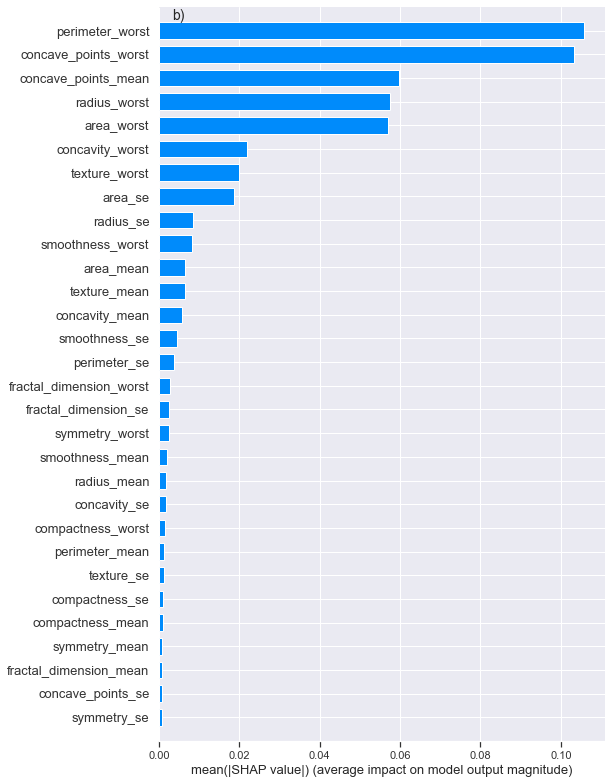

In [48]:
#3: Shap based featured importance: all columns, scaled


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", max_display=30, show=False)
plt.annotate("b)", xy=(0.03, 0.983), xycoords='axes fraction', fontsize=14)
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


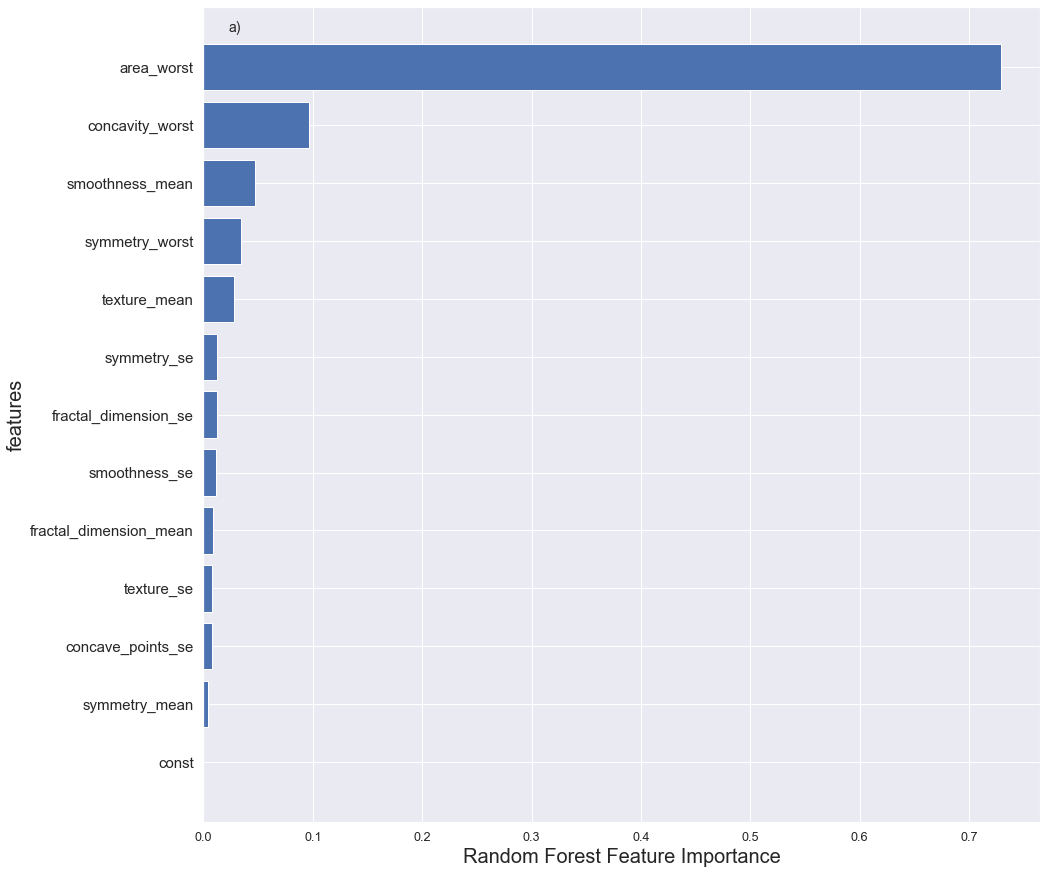

In [49]:
#4 Feature importances: selected columns, scaled, random forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_1, y_train)
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(X_train_1.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance", fontsize=20);
plt.ylabel("features", fontsize=20);
plt.yticks(fontsize=15);
plt.annotate("a)", xy=(0.03, 0.97), xycoords='axes fraction', fontsize=14)
plt.show()

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


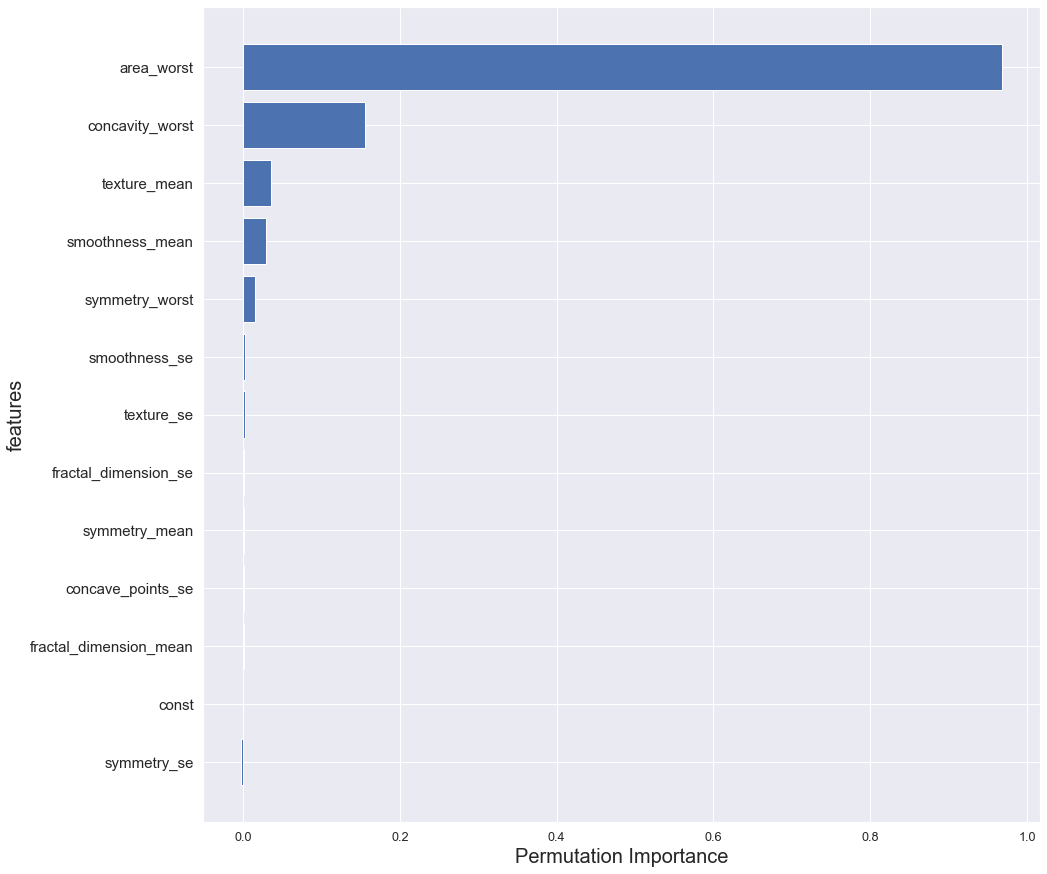

In [50]:
#5 Feature importances: selected columns, scaled, permutation-based
X_test_1 = sm.add_constant(X_test_scaled)
X_test_1 = X_test_1[features]
perm_importance = permutation_importance(rf, X_test_1, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(X_test_1.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=20);
plt.ylabel("features", fontsize=20);
plt.yticks(fontsize=15);

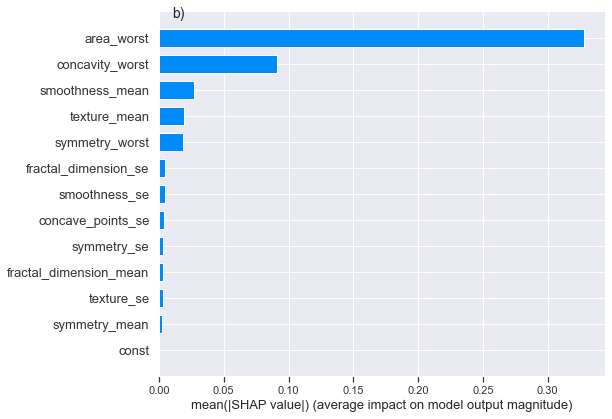

In [51]:
#6: Shap based featured importance: selected columns, scaled
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_1)
shap.summary_plot(shap_values, X_test_1, plot_type="bar", max_display=30, show=False)
plt.annotate("b)", xy=(0.03, 0.983), xycoords='axes fraction', fontsize=14)
plt.show()

Precision score 1.0
Recall score  0.96875


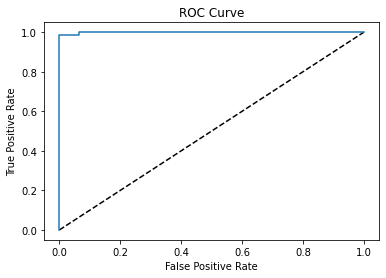

ROC-AUC score : 0.984375


In [85]:
clf = LogisticRegression(C=0.1)
clf.fit(X_train_select, y_train)
y_pred_1 = clf.predict(X_test_select)

print('Precision score', metrics.precision_score(y_test,y_pred_1))
print('Recall score ', metrics.recall_score(y_test,y_pred_1))
y_pred_prob = clf.predict_proba(X_test_select)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC score :", roc_auc_score(y_test, y_pred_1))

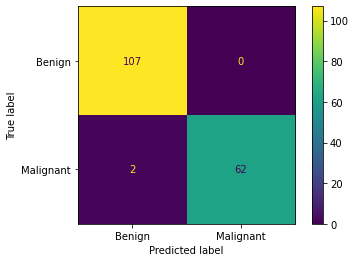

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       107
         1.0       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [66]:
cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_1))

In [67]:



from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score

pipe = make_pipeline(
    SelectKBest(f_classif),
    LogisticRegression()
)



In [68]:
k = [k+1 for k in range(X_train_select.shape[1])]
grid_params = {'selectkbest__k': k}
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train_select, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24]})

Precision score 0.984375
Recall score  0.984375


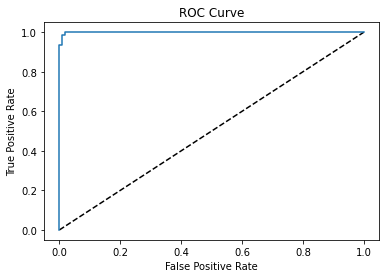

ROC-AUC score : 0.9875146028037384


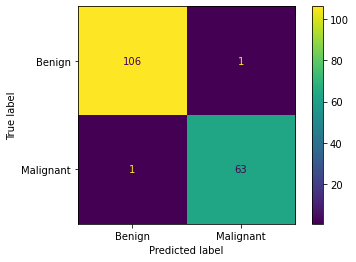

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       107
         1.0       0.98      0.98      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Index(['area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'concave points_se', 'texture_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [77]:
y_pred_1 = lr_grid_cv.predict(X_test_select)
print('Precision score', metrics.precision_score(y_test,y_pred_1))
print('Recall score ', metrics.recall_score(y_test,y_pred_1))
y_pred_prob = lr_grid_cv.predict_proba(X_test_select)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC score :", roc_auc_score(y_test, y_pred_1))
cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_1))

selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

print(X_train_select.columns[selected])

In [83]:
#Model 2: KNN
from sklearn.neighbors import KNeighborsClassifier

klist = np.arange(0,11)
knn = KNeighborsClassifier()
grid_params = {'n_neighbors': klist}
knn_grid_cv = GridSearchCV(knn, param_grid=grid_params, cv=5, n_jobs=-1)
knn_grid_cv.fit(X_train_select, y_train)
y_pred_2 = knn_grid_cv.predict(X_test_select)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.95984177 0.93968354 0.95981013 0.94477848 0.94221519
 0.9321519  0.93718354 0.93971519 0.94471519 0.9321519 ]
  warnings.warn(


Precision score 0.9264705882352942
Recall score  0.984375


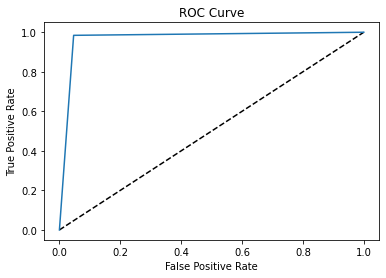

ROC-AUC score : 0.9688230140186916


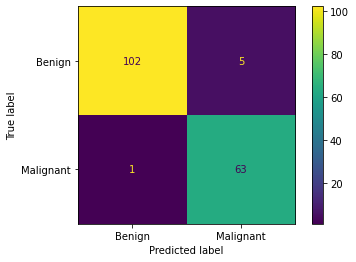

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       107
         1.0       0.93      0.98      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [84]:
print('Precision score', metrics.precision_score(y_test,y_pred_2))
print('Recall score ', metrics.recall_score(y_test,y_pred_2))
y_pred_prob = knn_grid_cv.predict_proba(X_test_select)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC score :", roc_auc_score(y_test, y_pred_2))
cm = confusion_matrix(y_test, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_2))

In [ ]:
#Model 3: SVM
from sklearn.svm import SVC

svm = SVC()

In [ ]:
#Model 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
#PCA versions of 1-4
from sklearn.decomposition import PCA

pca = PCA()


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
#import lightgbm
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool



In [ ]:
#Define Bayesian function that we wish to maximize

def clf_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : 0.03,
        "subsample_freq" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }